In [1]:
import pandas as pd

alldata = pd.read_csv('./dataset/AllData.csv', low_memory=False)
data_part1 = pd.read_csv('./dataset/Data_part1.csv', low_memory=False)
data_part1Stage2 = pd.read_csv('./dataset/Data_part1Stage2.csv', low_memory=False)
data_part2 = pd.read_csv('./dataset/Data_part2.csv', low_memory=False)
data_part2Stage2 = pd.read_csv('./dataset/Data_part2Stage2.csv', low_memory=False)
data_part3 = pd.read_csv('./dataset/Data_part3.csv', low_memory=False)
data_part3Stage2 = pd.read_csv('./dataset/Data_part3Stage2.csv', low_memory=False)
data_part4 = pd.read_csv('./dataset/Data_part4.csv', low_memory=False)
data_part4Stage2 = pd.read_csv('./dataset/Data_part4Stage2.csv', low_memory=False)
data_part5Stage2 = pd.read_csv('./dataset/Data_part5Stage2.csv', low_memory=False)

In [24]:
all_dataset_names = [alldata, data_part1, data_part1Stage2, data_part2, data_part2Stage2, data_part3, data_part3Stage2, data_part4, data_part4Stage2, data_part5Stage2]
complete_dataset = pd.concat(all_dataset_names, ignore_index=True, sort=False).drop(columns=['Unnamed: 0'])
complete_dataset = complete_dataset.drop(columns=list(complete_dataset.filter(regex = '^cf')))
complete_dataset

,alias,assigned_to,assigned_to_detail,blocks,cc,cc_detail,classification,comment_count,component,creation_time,...,see_also,severity,status,summary,target_milestone,type,url,version,votes,whiteboard
0,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...","10276, 104166","['amanforindia@gmail.com', 'andrewm715+bugzill...","[{'email': 'amanforindia@gmail.com', 'real_nam...",Components,95,Networking: HTTP,1998-04-23T14:00:00Z,...,[],normal,NEW,Proxy: map HTTP 500 errors to necko errors (so...,Future,enhancement,NaN,Trunk,13,[PDT-][necko-backlog]
1,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",36557,"['klonos@gmail.com', 'leif@ogre.com', 'martin....","[{'email': 'klonos@gmail.com', 'real_name': 'k...",Components,16,LDAP Integration,1999-02-04T21:59:11Z,...,[],normal,NEW,[LDAP] Access to a local LDAP server in Off-Li...,---,enhancement,NaN,Trunk,4,NaN
2,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...","76449, 250163","['ben.bucksch@beonex.com', 'blog@tessarakt.de'...","[{'email': 'ben.bucksch@beonex.com', 'real_nam...",Components,45,Composition,1999-03-15T18:25:11Z,...,[],normal,NEW,Warnings for USENET etiquette errors required ...,---,enhancement,http://www.xs4all.nl/~js/gnksa/Evaluations/net...,Trunk,10,"15b, 16e still needed"
3,NaN,ben.bucksch@beonex.com,"{'email': 'ben.bucksch@beonex.com', 'real_name...",913768,"['3.14@piology.org', 'aha@pinknet.cz', 'alecf@...","[{'email': '3.14@piology.org', 'real_name': ""B...",Components,53,MIME,1999-04-21T16:06:02Z,...,[],normal,NEW,URL linkifying code should cross linebreaks [l...,---,enhancement,NaN,Trunk,20,Bug in libmime due to line-based stream proces...
4,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",171467,"['acelists@atlas.sk', 'alex@mozillazine.org', ...","[{'email': 'acelists@atlas.sk', 'real_name': '...",Client Software,49,Bookmarks & History,1999-06-22T05:44:52Z,...,[],normal,NEW,Automatically update bookmarks when sites move...,---,enhancement,http://www.w3.org/Protocols/rfc2616/rfc2616-se...,Trunk,47,[ben-m5][2012 Fall Equinox]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65560,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1467214,[],[],Components,1,Disability Access APIs,2019-08-09T20:40:29Z,...,[],normal,NEW,Fix usage of nsIDocShellTreeItem in LogDocShel...,---,enhancement,NaN,unspecified,0,NaN
65561,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1378418,"['mmucci@mozilla.com', 'pbrosset@mozilla.com']","[{'email': 'mmucci@mozilla.com', 'real_name': ...",Components,1,Framework,2018-02-28T10:33:13Z,...,[],normal,NEW,Improve performance of VisibilityHelper,---,enhancement,NaN,unspecified,1,NaN
65562,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",NaN,['jruderman@gmail.com'],"[{'email': 'jruderman@gmail.com', 'real_name':...",Client Software,2,Tabbed Browser,2007-08-22T16:05:29Z,...,[],normal,RESOLVED,Dragging a tab outside the current window shou...,---,enhancement,NaN,unspecified,0,NaN
65563,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1467214,[],[],Components,1,Disability Access APIs,2019-08-09T21:10:46Z,...,[],normal,NEW,Fix usage of nsIDocShellTreeItem in IsARIALive,---,enhancement,NaN,unspecified,0,NaN


In [4]:
#Start Exploratory Data Analysis Here
#For a particular product, how many dependencies of a particular type?

#value_counts_products = complete_dataset[complete_dataset['depends_on'].notna()]["product"].value_counts()
dataset_dependson_defined = complete_dataset[complete_dataset['depends_on'].notna()]
for i in range(0, len(dataset_dependson_defined)):
    original_string = dataset_dependson_defined.iloc[i]['depends_on'].split(",")
    for j in range(0, len(original_string)):
        if j == 0:
            dataset_dependson_defined.iloc[i, dataset_dependson_defined.columns.get_loc('depends_on')] = [int(original_string[j].strip())]
        else:
            dataset_dependson_defined.iloc[i, dataset_dependson_defined.columns.get_loc('depends_on')].append(int(original_string[j].strip()))
dataset_dependson_defined['depends_on']

dataset_dependson_defined[dataset_dependson_defined["product"] == "Core"]["depends_on"]



#dataset_dependson_defined.iloc[0]








#for i in range(0, len(dataset_dependson_defined)):
#    temp = dataset_dependson_defined.loc[i]['depends_on']
#    dataset_dependson_defined.loc[i, 'depends_on'] = [100, 2]
    #dataset_dependson_defined.iloc[i]['depends_on'] = temp.split(",")
    #for j in range(0, len(dataset_dependson_defined.iloc[i]['depends_on'])):
    #    dataset_dependson_defined.iloc[i]['depends_on'][j].strip()
    #print(dataset_dependson_defined.iloc[i]['depends_on'])
#    break

#print(dataset_dependson_defined.loc[0]['depends_on'])
#core_products = dataset_dependson_defined[dataset_dependson_defined["product"] == "Core"]["depends_on"]
#core_products[0].split(",")[0].strip()







#complete_dataset.columns.tolist()

#complete_dataset[complete_dataset.id == 150580]
#complete_dataset["product"].value_counts().index.tolist()
#complete_dataset["depends_on"]
#complete_dataset[complete_dataset['depends_on'].notna()]["product"].value_counts().values.tolist()
#dataset_w_dependencies = complete_dataset[complete_dataset['depends_on'].notna()]
#dataset_w_dependencies

#temp = complete_dataset[complete_dataset['depends_on'].notna()]["product"].value_counts()
#temp = temp[temp.values <= 10]
#temp.index.tolist()

#temp = complete_dataset[complete_dataset['depends_on'].notna()]
#temp = temp[temp.product == "Firefox"]
#complete_dataset[complete_dataset["product"] == "Core"]
#type(complete_dataset[complete_dataset['depends_on'].notna()])#[complete_dataset['product'] == "Core"]

0                                   [20400, 88217, 127872]
14                                        [240421, 637572]
17                                          [48322, 36665]
19                                                 [71647]
21                                                 [78248]
                               ...                        
65538    [1575383, 1411922, 1572291, 1573249, 1574927, ...
65540                          [1299970, 1310663, 1374400]
65542                                   [1310660, 1374393]
65543    [1441292, 1441737, 1441430, 1442433, 1447951, ...
65551                                            [1441752]
Name: depends_on, Length: 12054, dtype: object

In [31]:
temp = complete_dataset[complete_dataset['depends_on'].notna()]["product"].value_counts()
temp = temp[temp.values > 50]
temp.index.tolist()

['Core',
 'Firefox',
 'DevTools',
 'Toolkit',
 'Testing',
 'Firefox Build System',
 'Bugzilla',
 'Thunderbird',
 'WebExtensions',
 'MailNews Core',
 'SeaMonkey',
 'Infrastructure & Operations',
 'bugzilla.mozilla.org',
 'Taskcluster',
 'Firefox for Android',
 'Tree Management',
 'Remote Protocol',
 'Release Engineering',
 'Data Platform and Tools',
 'GeckoView',
 'Core Graveyard',
 'Calendar',
 'Developer Services',
 'Chat Core',
 'Socorro',
 'mozilla.org',
 'NSS',
 'developer.mozilla.org',
 'Marketing',
 'Cloud Services',
 'Conduit',
 'Data Science',
 'Other Applications']

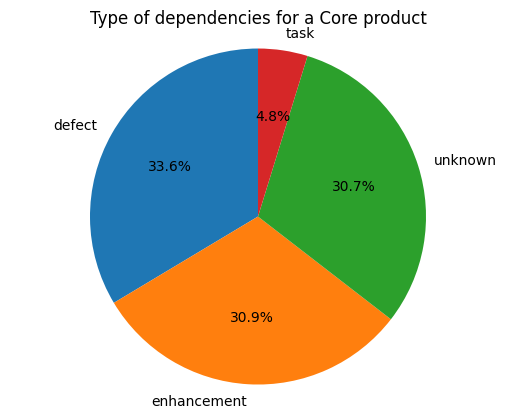

In [32]:
dataset_dependson_defined = complete_dataset[complete_dataset['depends_on'].notna()]
dataset_dependson_defined = dataset_dependson_defined[dataset_dependson_defined["product"] == "Core"]
final_string = ""
for index, row in dataset_dependson_defined.iterrows():
    final_string = final_string +"," +row['depends_on'].replace(" ", "")
all_dependson = final_string.split(",")[1:]

import numpy as np
list_of_types = []
temp = []
for i in range(0, len(all_dependson)):
    result = complete_dataset[complete_dataset.id == int(all_dependson[i])]
    if result.empty:
        list_of_types.append('unknown')
    else:
        list_of_types.append(result['type'].values[0])
print(pd.Series(list_of_types).value_counts().tolist())
#For a particular product (Core), how many dependencies of a particular type?
#28577 dependencies on defects
#26322 dependencies on enhancements
#26130 dependencies on unknowns (i.e they aren't in the dataset)
#4051 dependencies on tasks

import matplotlib.pyplot as plt
plt.title("Type of dependencies for a Core product")
plt.pie(pd.Series(list_of_types).value_counts().values.tolist(), labels = pd.Series(list_of_types).value_counts().index.tolist(), autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

[11348, 10709, 5708, 1824]


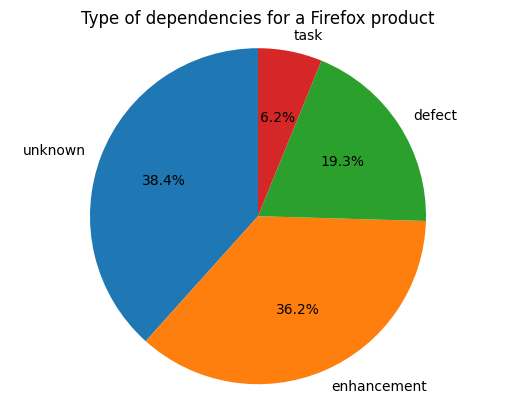

In [35]:
dataset_dependson_defined = complete_dataset[complete_dataset['depends_on'].notna()]
dataset_dependson_defined = dataset_dependson_defined[dataset_dependson_defined["product"] == "Firefox"]
final_string = ""
for index, row in dataset_dependson_defined.iterrows():
    final_string = final_string +"," +row['depends_on'].replace(" ", "")
all_dependson = final_string.split(",")[1:]

import numpy as np
list_of_types = []
temp = []
for i in range(0, len(all_dependson)):
    result = complete_dataset[complete_dataset.id == int(all_dependson[i])]
    if result.empty:
        list_of_types.append('unknown')
    else:
        list_of_types.append(result['type'].values[0])
print(pd.Series(list_of_types).value_counts().tolist())
#For a particular product (Core), how many dependencies of a particular type?
#5708 dependencies on defects
#10709 dependencies on enhancements
#11348 dependencies on unknowns (i.e they aren't in the dataset)
#1824 dependencies on tasks

import matplotlib.pyplot as plt
plt.title("Type of dependencies for a Firefox product")
plt.pie(pd.Series(list_of_types).value_counts().values.tolist(), labels = pd.Series(list_of_types).value_counts().index.tolist(), autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

[8170, 5175, 4356, 1243]


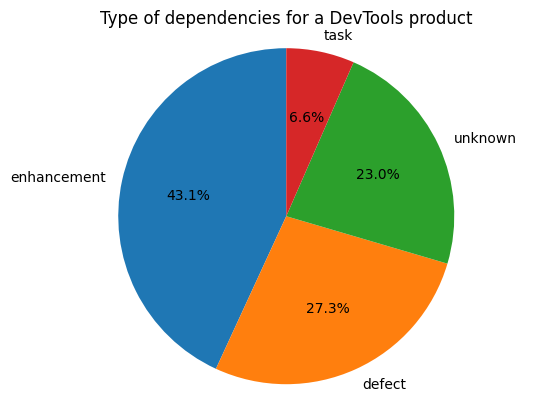

In [34]:
dataset_dependson_defined = complete_dataset[complete_dataset['depends_on'].notna()]
dataset_dependson_defined = dataset_dependson_defined[dataset_dependson_defined["product"] == "DevTools"]
final_string = ""
for index, row in dataset_dependson_defined.iterrows():
    final_string = final_string +"," +row['depends_on'].replace(" ", "")
all_dependson = final_string.split(",")[1:]

import numpy as np
list_of_types = []
temp = []
for i in range(0, len(all_dependson)):
    result = complete_dataset[complete_dataset.id == int(all_dependson[i])]
    if result.empty:
        list_of_types.append('unknown')
    else:
        list_of_types.append(result['type'].values[0])
print(pd.Series(list_of_types).value_counts().tolist())
#For a particular product (Core), how many dependencies of a particular type?
#5175 dependencies on defects
#8170 dependencies on enhancements
#4356 dependencies on unknowns (i.e they aren't in the dataset)
#1243 dependencies on tasks

import matplotlib.pyplot as plt
plt.title("Type of dependencies for a DevTools product")
plt.pie(pd.Series(list_of_types).value_counts().values.tolist(), labels = pd.Series(list_of_types).value_counts().index.tolist(), autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()

[3204, 2585, 2131, 916]


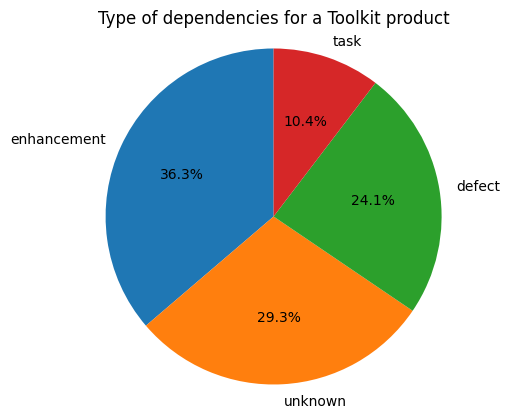

In [36]:
dataset_dependson_defined = complete_dataset[complete_dataset['depends_on'].notna()]
dataset_dependson_defined = dataset_dependson_defined[dataset_dependson_defined["product"] == "Toolkit"]
final_string = ""
for index, row in dataset_dependson_defined.iterrows():
    final_string = final_string +"," +row['depends_on'].replace(" ", "")
all_dependson = final_string.split(",")[1:]

import numpy as np
list_of_types = []
temp = []
for i in range(0, len(all_dependson)):
    result = complete_dataset[complete_dataset.id == int(all_dependson[i])]
    if result.empty:
        list_of_types.append('unknown')
    else:
        list_of_types.append(result['type'].values[0])
print(pd.Series(list_of_types).value_counts().tolist())
#For a particular product (Core), how many dependencies of a particular type?
#2131 dependencies on defects
#3204 dependencies on enhancements
#2585 dependencies on unknowns (i.e they aren't in the dataset)
#916 dependencies on tasks

import matplotlib.pyplot as plt
plt.title("Type of dependencies for a Toolkit product")
plt.pie(pd.Series(list_of_types).value_counts().values.tolist(), labels = pd.Series(list_of_types).value_counts().index.tolist(), autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()